# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed me to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires me to build a model wherein I'll need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

# Goals of the Case Study
There are quite a few goals for this case study.

* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
* There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


***

### Importing All The Neccessary Modules    

In [1]:
# Basic libraries to work on the dataframe
import numpy as np
import pandas as pd

# data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Increasing the columns views limit
pd.options.display.max_columns = None
pd.options.display.max_rows = 150
pd.options.display.float_format = '{:.2f}'.format

# 1. Data Reading and Understanding

In [2]:
#Reading the data file using pandas
df_data = pd.read_csv("Leads.csv")
df_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
# check the shape of the dataset
df_data.shape

(9240, 37)

In [4]:
# check statistics for numerical columns
df_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [5]:
# check whether there are any duplicates
df_data.duplicated().sum()

0

In [6]:
#Lets have a look at all the columns, their datatypes and also get an idea of null values present
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**Observations**
* A large number of columns have null values. Those columns should ideally be dropped
* `Prospect ID` and `Lead Number` both serve the same purpose. They are both unique identifiers. We will drop `Prospect ID`
* Column names are just too long. We will modify the column names
* Few categorical columns have "Select" in their entries. Those select are essentially null values because Select appears when someone does not select anything from the dropdown

# 2. Data Cleaning

## 2.1 Rename column names

* Long column names make analysis tiring as one has to always refer to column names. Also has impact on charts created later on
* Ideally, we should follow python's preferred Snakecase nomenclature

In [7]:
# change nomenclature to snakecase
df_data.columns = df_data.columns.str.replace(' ', '_').str.lower()

# test
df_data.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [8]:
# shorten column names
df_data.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

df_data.head(3)

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened


In [9]:
#Droping `prospect_id` column
df_data.drop('prospect_id', axis = 1, inplace = True)

## 2.2 Replace "Select" category with null values

In [10]:
# Select all non-numeric columns
df_obj = df_data.select_dtypes(include='object')

# Find out columns that have "Select"
s = lambda x: x.str.contains('Select', na=False)
l = df_obj.columns[df_obj.apply(s).any()].tolist()
print (l)

['specialization', 'source', 'lead_profile', 'city']


There are 4 columns that contains `Select`, which are effectively null values. We are going to make that change 

In [11]:
# select all the columns that have a "Select" entry
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace values
df_data[sel_cols] = df_data[sel_cols].replace('Select', np.NaN)

df_data.head(4)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,last_activity,country,specialization,source,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,tags,lead_quality,supply_chain_content_updates,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified


## 2.3 Handle null values and sales generated columns

- Given there are a number of columns with very high number of null entries, let's calculate the percentage of null values in each column, and take a decision from there.
- Furthermore, we can also drop Sales generated columns because those are the data entries that are made after the sales team has connected with the student. Those data have no bearing to the purpose of our model ie. providing lead score. The columns are
    * `tags`
    * `lead_quality`
    * all `asymmetrique` columns
    * `last_activity`
    * `last_notable_activity`

In [12]:
# Calculate percentage of null values for each column
(df_data.isnull().sum() / df_data.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
last_activity                   1.11
country                        26.63
specialization                 36.58
source                         78.46
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
tags                           36.29
lead_quality                   51.59
supply_chain_content_updates    0.00
dm_content_updates              0.00
l

**Observation**: As can be seen, there are quite a few columns with high number of missing data. Since there are no ways to get data back from reliable sources, we can drop all those columns that have missing values > 40%

### 2.3.1 Drop columns that have null values > 40% or Sales generated columns

In [13]:
df_data.drop(['source', 'lead_quality', 'lead_profile', 'asymmetrique_activity_index', 
                      'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score',
        'tags', 'last_activity', 'last_notable_activity'], 
        axis = 1, inplace = True)

df_data.head(3)

,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,country,specialization,occupation,course_selection_reason,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,courses_updates,supply_chain_content_updates,dm_content_updates,city,cheque_payment,mastering_interview
0,660737,API,Olark Chat,No,No,0,0.00,0,0.00,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,660728,API,Organic Search,No,No,0,5.00,674,2.50,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes


In [14]:
# Lets look at what are we left with
# Calculate percentage of null values for each column
(df_data.isnull().sum() / df_data.shape[0]) * 100

lead_number                     0.00
lead_origin                     0.00
lead_source                     0.39
do_not_email                    0.00
do_not_call                     0.00
converted                       0.00
total_visits                    1.48
time_on_website                 0.00
page_views_per_visit            1.48
country                        26.63
specialization                 36.58
occupation                     29.11
course_selection_reason        29.32
search                          0.00
magazine                        0.00
newspaper_article               0.00
x_education_forums              0.00
newspaper                       0.00
digital_advertisement           0.00
through_recommendations         0.00
courses_updates                 0.00
supply_chain_content_updates    0.00
dm_content_updates              0.00
city                           39.71
cheque_payment                  0.00
mastering_interview             0.00
dtype: float64

**Observations**
<br>There are five columns that still have high null values: `country`, `specialization`, `occupation`, `course_selection_reason`, and `city`. We will look at them individually to see what can be done

### 2.3.2 `country` column

In [15]:
df_data.country.value_counts(normalize = True, dropna = False) * 100

India                  70.26
NaN                    26.63
United States           0.75
United Arab Emirates    0.57
Singapore               0.26
Saudi Arabia            0.23
United Kingdom          0.16
Australia               0.14
Qatar                   0.11
Hong Kong               0.08
Bahrain                 0.08
Oman                    0.06
France                  0.06
unknown                 0.05
Nigeria                 0.04
Canada                  0.04
Kuwait                  0.04
South Africa            0.04
Germany                 0.04
Sweden                  0.03
Italy                   0.02
Belgium                 0.02
Bangladesh              0.02
Netherlands             0.02
Ghana                   0.02
China                   0.02
Asia/Pacific Region     0.02
Uganda                  0.02
Philippines             0.02
Switzerland             0.01
Russia                  0.01
Liberia                 0.01
Tanzania                0.01
Vietnam                 0.01
Kenya         

**Observation**
<br> The distribution of the data is very heavily skewed, with India + null values = 97% of the total. It is safe to drop this column.

In [16]:
# Dropping country column
df_data.drop('country', axis = 1, inplace = True)

### 2.3.3 `course_selection_reason` column

In [17]:
df_data.course_selection_reason.value_counts(normalize = True, dropna = False) * 100

Better Career Prospects     70.65
NaN                         29.32
Flexibility & Convenience    0.02
Other                        0.01
Name: course_selection_reason, dtype: float64

**Observation**
<br> The distribution of the data is very heavily skewed, with Better career prospects + null values = approx 100% of the total. It is safe to drop this column.

In [18]:
# Dropping course_selection_reason column
df_data.drop('course_selection_reason', axis = 1, inplace = True)

### 2.3.4 `occupation` column

In [19]:
df_data.occupation.value_counts(normalize = True, dropna = False) * 100

Unemployed             60.61
NaN                    29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: occupation, dtype: float64

**Observation**
<br> For occupation, we can first combine categories, and then impute proportionally to maintain the distribution and not introduce bias

In [20]:
# combine low representing categories
df_data.loc[(df_data.occupation == 'Student') | (df_data.occupation == 'Other') | (df_data.occupation == 'Housewife') | 
       (df_data.occupation == 'Businessman') , 'occupation'] = 'Student and Others'

In [21]:
df_data.occupation.value_counts(normalize = True) * 100

Unemployed             85.50
Working Professional   10.78
Student and Others      3.73
Name: occupation, dtype: float64

In [22]:
# impute proportionately
df_data['occupation'] = df_data.occupation.fillna(pd.Series(np.random.choice(['Unemployed', 'Working Professional', 
                                                                    'Student and Others'], 
                                                                   p = [0.8550, 0.1078, 0.0372], size = len(df_data))))

### 2.3.5 `specialization` column

In [23]:
df_data.specialization.value_counts(normalize = True, dropna = False) * 100

NaN                                 36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Media and Advertising                2.20
Travel and Tourism                   2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: specialization, dtype: float64

**Observation**
<br> For specialization, we can first combine categories based on the course type, and then impute proportionally to maintain the distribution and not introduce bias

In [24]:
# categorize all management courses
df_data.loc[(df_data.specialization == 'Finance Management') | (df_data.specialization == 'Human Resource Management') | 
       (df_data.specialization == 'Marketing Management') |  (df_data.specialization == 'Operations Management') |
       (df_data.specialization == 'IT Projects Management') | (df_data.specialization == 'Supply Chain Management') |
       (df_data.specialization == 'Healthcare Management') | (df_data.specialization == 'Hospitality Management') |
       (df_data.specialization == 'Retail Management') , 'specialization'] = 'Management Specializations'

# categorize all busines courses
df_data.loc[(df_data.specialization == 'Business Administration') | (df_data.specialization == 'International Business') | 
       (df_data.specialization == 'Rural and Agribusiness') | (df_data.specialization == 'E-Business') 
        , 'specialization'] = 'Business Specializations'

# categorize all industry courses
df_data.loc[(df_data.specialization == 'Banking, Investment And Insurance') | (df_data.specialization == 'Media and Advertising') |
       (df_data.specialization == 'Travel and Tourism') | (df_data.specialization == 'Services Excellence') |
       (df_data.specialization == 'E-COMMERCE'), 'specialization'] = 'Industry Specializations'

In [25]:
df_data.specialization.value_counts(normalize = True) * 100

Management Specializations   72.58
Industry Specializations     15.29
Business Specializations     12.13
Name: specialization, dtype: float64

In [26]:
# impute proportionately
df_data['specialization'] = df_data.specialization.fillna(pd.Series(np.random.choice(['Management Specializations',  
                                                    'Business Specializations', 'Industry Specializations'], 
                                                                   p = [0.7258, 0.1213, 0.1529 ], size = len(df_data))))

### 2.3.6 `city` column

In [27]:
df_data.city.value_counts(normalize = True, dropna = False) * 100

NaN                           39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: city, dtype: float64

**Observations**
We will categorize cities based on logical decisions and impute proportionately

In [28]:
# categorize all non-mumbai, but Maharashtra cities
df_data.loc[(df_data.city == 'Thane & Outskirts') | (df_data.city == 'Other Cities of Maharashtra'), 
       'city'] = 'Non-Mumbai Maharashtra Cities'

# categorize all other cities
df_data.loc[(df_data.city == 'Other Cities') | (df_data.city == 'Other Metro Cities') | (df_data.city == 'Tier II Cities') , 
       'city'] = 'Non-Maharashtra Cities'

In [29]:
df_data.city.value_counts(normalize = True) * 100

Mumbai                          57.84
Non-Mumbai Maharashtra Cities   21.70
Non-Maharashtra Cities          20.46
Name: city, dtype: float64

In [30]:
# impute proportionately
df_data['city'] = df_data.city.fillna(pd.Series(np.random.choice(['Mumbai', 'Non-Mumbai Maharashtra Cities', 
                                                                    'Non-Maharashtra Cities'], 
                                                                   p = [0.5784, 0.2170, 0.2046 ], size = len(df_data))))

## 2.4 Handle categorical columns with low number of missing values and low representation of categories

In this step, we will go through the rest of the categorical columns one by one and
* Merge categories that have low representation
* Impute the missing values

In [31]:
(df_data.isnull().sum() / df_data.shape[0]) * 100

lead_number                    0.00
lead_origin                    0.00
lead_source                    0.39
do_not_email                   0.00
do_not_call                    0.00
converted                      0.00
total_visits                   1.48
time_on_website                0.00
page_views_per_visit           1.48
specialization                 0.00
occupation                     0.00
search                         0.00
magazine                       0.00
newspaper_article              0.00
x_education_forums             0.00
newspaper                      0.00
digital_advertisement          0.00
through_recommendations        0.00
courses_updates                0.00
supply_chain_content_updates   0.00
dm_content_updates             0.00
city                           0.00
cheque_payment                 0.00
mastering_interview            0.00
dtype: float64

In [32]:
# determine unique values for all object datatype columns
for k, v in df_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 5
lead_source = 21
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
<br> As can be seen from the above output, the categorical columns (i.e. number of unique values > 2) are:
* `lead_origin`
* `lead_source`

### 2.4.1 `lead_origin` column

In [33]:
df_data.lead_origin.value_counts(normalize = True, dropna = False) * 100

Landing Page Submission   52.88
API                       38.74
Lead Add Form              7.77
Lead Import                0.60
Quick Add Form             0.01
Name: lead_origin, dtype: float64

In [34]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df_data.loc[(df_data.lead_origin == 'Lead Import') | (df_data.lead_origin == 'Quick Add Form') | (df_data.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Lead Add Form and Others'

### 2.4.2 `lead_source` column

In [35]:
df_data.lead_source.value_counts(normalize = True, dropna = False) * 100

Google              31.04
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
NaN                  0.39
bing                 0.06
google               0.05
Click2call           0.04
Live Chat            0.02
Press_Release        0.02
Social Media         0.02
WeLearn              0.01
Pay per Click Ads    0.01
welearnblog_Home     0.01
NC_EDM               0.01
testone              0.01
blog                 0.01
youtubechannel       0.01
Name: lead_source, dtype: float64

In [36]:
# Lets impute the missing values with the mode of data i.e. clearly 'Google'
df_data.lead_source.fillna(df_data.lead_source.mode()[0], inplace=True)

In [37]:
#There are a lot of smaller values which will not be used as definitive factors, lets group them together
df_data['lead_source'] = df_data['lead_source'].apply(lambda x: x if 
                                            ((x== 'Google') | (x=='Direct Traffic') | (x=='Olark Chat') | 
                                             (x=='Organic Search') | (x=='Reference')) 
                                            else 'Other Social Sites')

## 2.5 Handle Binary columns

* Drop those columns that have significant data imbalance
* Drop all those columns that have only 1 unique entry

In [38]:
# determine unique values
for k, v in df_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_origin = 3
lead_source = 6
do_not_email = 2
do_not_call = 2
specialization = 3
occupation = 3
search = 2
magazine = 1
newspaper_article = 2
x_education_forums = 2
newspaper = 2
digital_advertisement = 2
through_recommendations = 2
courses_updates = 1
supply_chain_content_updates = 1
dm_content_updates = 1
city = 3
cheque_payment = 1
mastering_interview = 2


**Observation**
* The following columns can be dropped as they have just 1 unique values
    * `magazine`
    * `course_updates`
    * `supply_chain_content_updates`
    * `dm_content_updates`
    * `cheque_payment`
    
 Let's now check the data imbalance for the rest of the columns

In [39]:
# select rest of the binary columns in a new dataframe
df_bin = df_data[['do_not_email', 'do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'mastering_interview']]

# see value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

No    92.06
Yes    7.94
Name: do_not_email, dtype: float64

No    99.98
Yes    0.02
Name: do_not_call, dtype: float64

No    99.85
Yes    0.15
Name: search, dtype: float64

No    99.98
Yes    0.02
Name: newspaper_article, dtype: float64

No    99.99
Yes    0.01
Name: x_education_forums, dtype: float64

No    99.99
Yes    0.01
Name: newspaper, dtype: float64

No    99.96
Yes    0.04
Name: digital_advertisement, dtype: float64

No    99.92
Yes    0.08
Name: through_recommendations, dtype: float64

No    68.74
Yes   31.26
Name: mastering_interview, dtype: float64



**Observations**
<br> Because of heavy data imbalance, we can drop the following columns as well
* `do_not_call`
* `search`
* `newspaper_article`
* `x_education_forums`
* `newspaper`
* `digital_advertisement`
* `through_recommendations`

In [40]:
drop_bin = ['do_not_call', 'search', 'newspaper_article', 'x_education_forums', 
           'newspaper', 'digital_advertisement', 'through_recommendations', 'magazine', 'courses_updates', 
           'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment']

df_data.drop(drop_bin, axis = 1, inplace = True)

## 2.6 Handle Numerical columns

### 2.6.1 `lead_number` column: change datatype

`lead_number` column is a unique identifier for each leads. Therefore, aggregations won't be of any relevance. We should change it to object

In [41]:
df_data.lead_number = df_data.lead_number.astype('object')

### 2.6.2 `total_visits` column

For this column, we need to handle the missing values, and can convert the datatype to integer since visits can't be decimal

In [42]:
df_data.total_visits.fillna(df_data.total_visits.median(), inplace=True)
df_data.total_visits = df_data.total_visits.astype('int')

### 2.6.3 `page_views_per_visit` column

Handle missing values

In [43]:
df_data.page_views_per_visit.fillna(df_data.page_views_per_visit.median(), inplace=True)

In [44]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   lead_number           9240 non-null   object 
 1   lead_origin           9240 non-null   object 
 2   lead_source           9240 non-null   object 
 3   do_not_email          9240 non-null   object 
 4   converted             9240 non-null   int64  
 5   total_visits          9240 non-null   int32  
 6   time_on_website       9240 non-null   int64  
 7   page_views_per_visit  9240 non-null   float64
 8   specialization        9240 non-null   object 
 9   occupation            9240 non-null   object 
 10  city                  9240 non-null   object 
 11  mastering_interview   9240 non-null   object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 830.3+ KB


# 3. Exploratory Data Analysis

## 3.1 Numerical columns

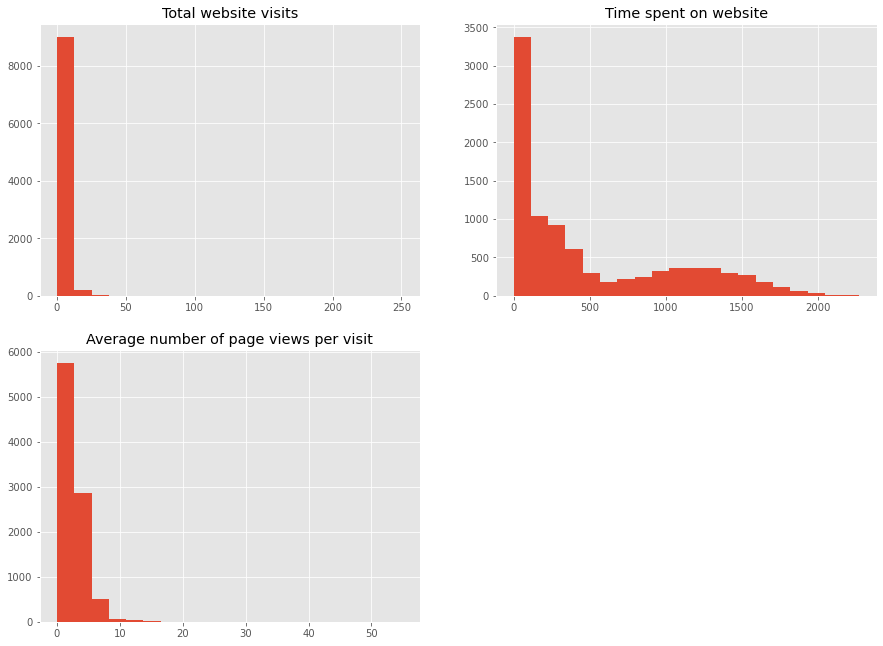

In [45]:
# Set style
plt.style.use('ggplot')

# See distribution of each of these columns
fig = plt.figure(figsize = (15, 11))
plt.subplot(2, 2, 1)
plt.hist(df_data.total_visits, bins = 20)
plt.title('Total website visits')

plt.subplot(2, 2, 2)
plt.hist(df_data.time_on_website, bins = 20)
plt.title('Time spent on website')

plt.subplot(2, 2, 3)
plt.hist(df_data.page_views_per_visit, bins = 20)
plt.title('Average number of page views per visit')

plt.show()

**Observations**
- High peaks and skewed data. There might be a possibility of outliers. We will check them next

### 3.1.1 Heatmap

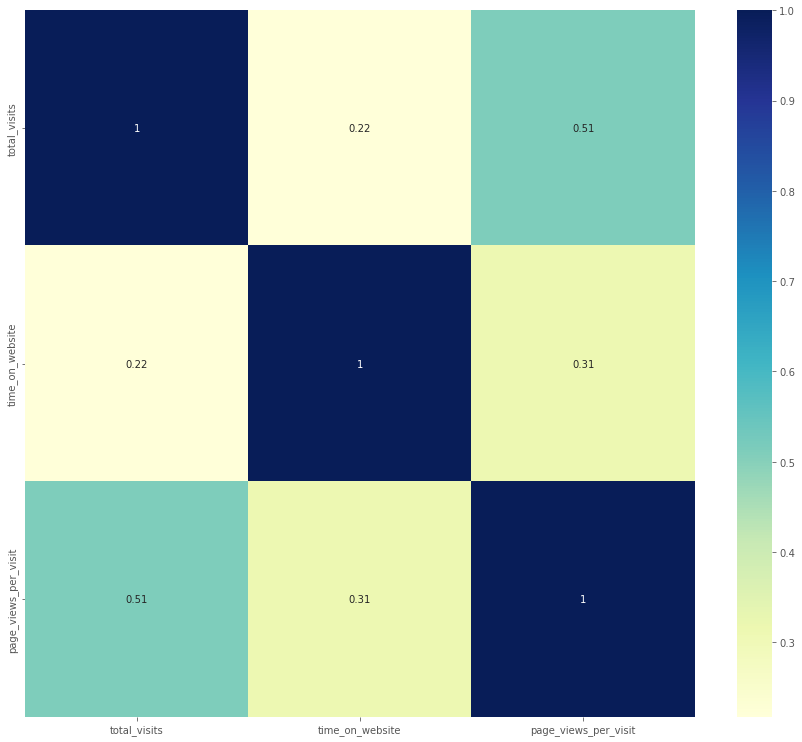

In [46]:
plt.figure(figsize = (15,13))
sns.heatmap(df_data[['total_visits', 'time_on_website', 'page_views_per_visit']].corr(), cmap="YlGnBu", annot = True)
plt.show()

**Observations**: No significaqnt correlation such that columns can be dropped

### 3.1.2 Check for outliers

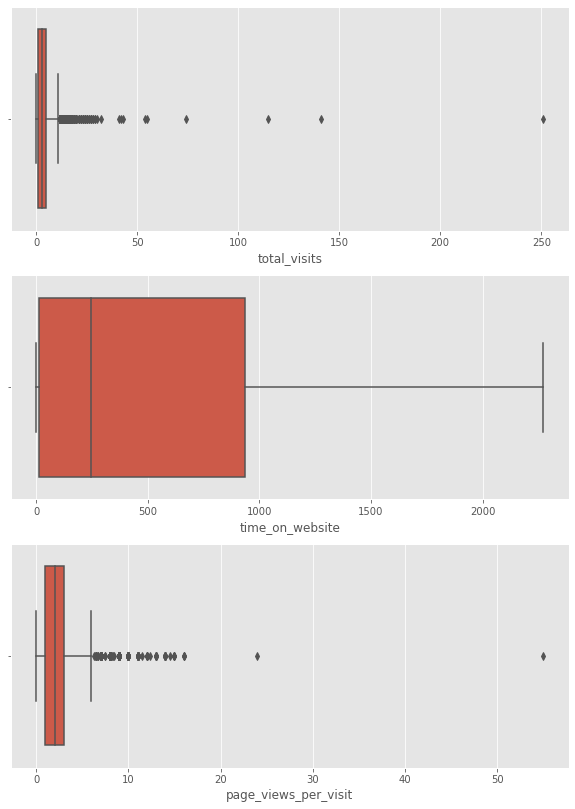

In [47]:
plt.figure(figsize = (10, 14))

plt.subplot(3,1,1)
sns.boxplot(df_data.total_visits)

plt.subplot(3,1,2)
sns.boxplot(df_data.time_on_website)

plt.subplot(3,1,3)
sns.boxplot(df_data.page_views_per_visit)
plt.show()

**Observations**

* Looking at both the box plots and the statistics, there are upper bound outliers in both `total_visits` and `page_views_per_visit` columns. We can also see that the data can be capped at 99 percentile.

## 3.2 Categorical columns

### 3.2.1 Lead Origin

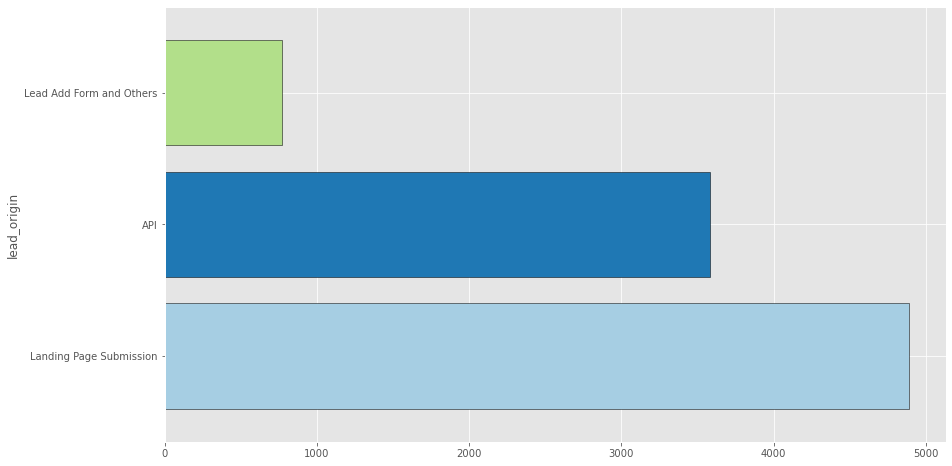

In [48]:
plt.figure(figsize = (14, 8))

df_data.groupby('lead_origin')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_data))))
plt.show()

In [49]:
df_data.head(2)

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,No,0,0,0,0.00,Management Specializations,Unemployed,Mumbai,No
1,660728,API,Organic Search,No,0,5,674,2.50,Industry Specializations,Unemployed,Mumbai,No


### 3.2.2 Lead Source

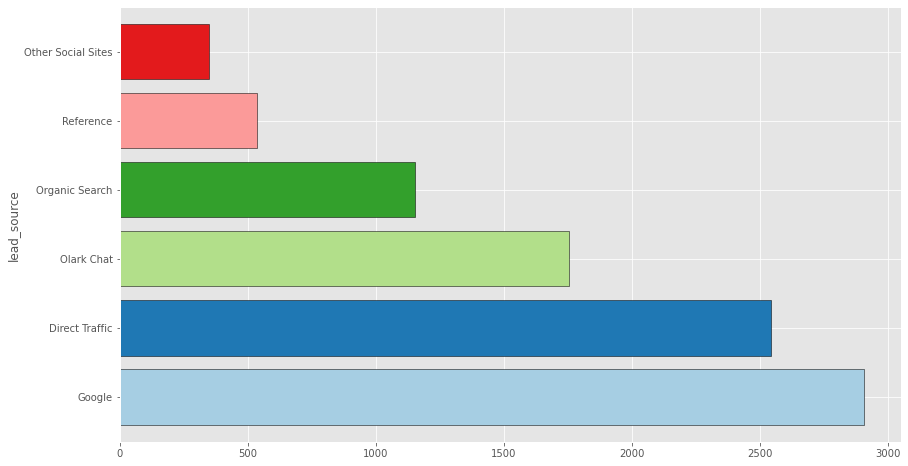

In [50]:
plt.figure(figsize = (14, 8))

df_data.groupby('lead_source')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_data))))
plt.show()

### 3.2.3 Specialization

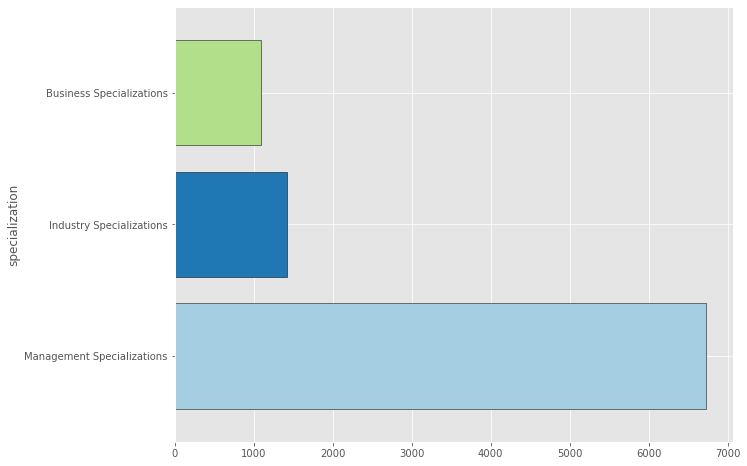

In [51]:
plt.figure(figsize = (10, 8))

df_data.groupby('specialization')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_data))))
plt.show()

Most of the speciliazation taken are management

### 3.2.4 Occupation

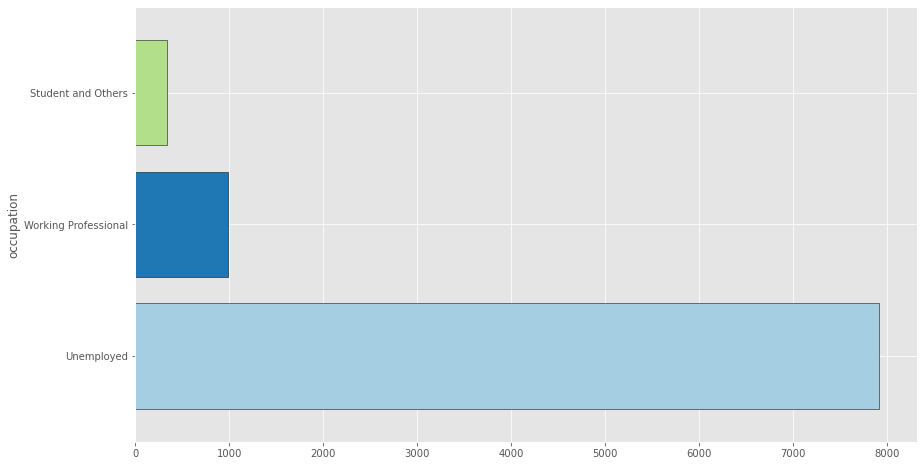

In [52]:
plt.figure(figsize = (14, 8))

df_data.groupby('occupation')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_data))))
plt.show()

Unempployed users are the most significant leads

### 3.2.5 City

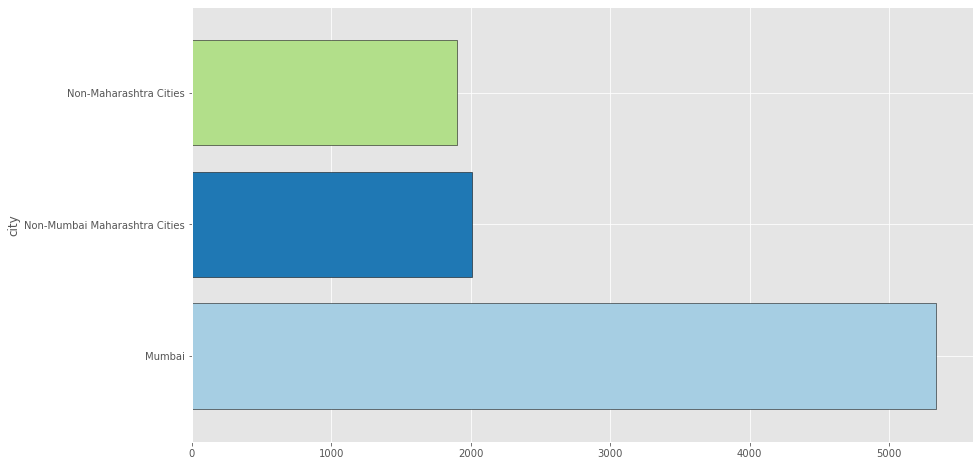

In [53]:
plt.figure(figsize = (14, 8))

df_data.groupby('city')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_data))))
plt.show()

Mumbai in particular and Maharashtra in general dominates the lead. This is likely due to the fact that the courses are based in Mumbai

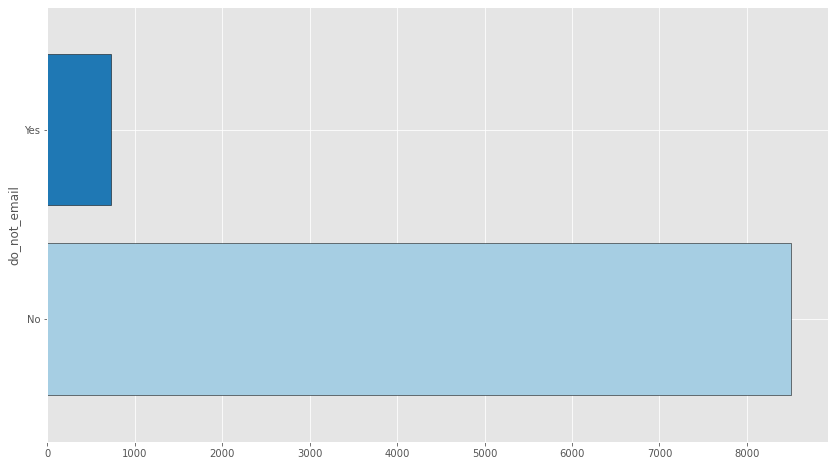

In [54]:
plt.figure(figsize = (14, 8))

df_data.groupby('do_not_email')['lead_number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8, 
                                                            edgecolor = 'black', 
                                                            color = plt.cm.Paired(np.arange(len(df_data))))
plt.show()

# 4.Data Preparation

## 4.1 Converting Binary (Yes/No) to 0/1

In [55]:
# determine unique values
for k, v in df_data.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

lead_number = 9240
lead_origin = 3
lead_source = 6
do_not_email = 2
specialization = 3
occupation = 3
city = 3
mastering_interview = 2


We have two binary columns: `do_not_email`, `mastering_interview`

In [56]:
binlist = ['do_not_email', 'mastering_interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_data[binlist] = df_data[binlist].apply(binary_map)

# check the operation was success
df_data.head()

,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,specialization,occupation,city,mastering_interview
0,660737,API,Olark Chat,0,0,0,0,0.00,Management Specializations,Unemployed,Mumbai,0
1,660728,API,Organic Search,0,0,5,674,2.50,Industry Specializations,Unemployed,Mumbai,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2.00,Business Specializations,Student and Others,Mumbai,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1.00,Industry Specializations,Unemployed,Mumbai,0
4,660681,Landing Page Submission,Google,0,1,2,1428,1.00,Management Specializations,Unemployed,Mumbai,0


## 4.2 Creating dummy variable for categorical columns

Categorical columns are: `lead_origin`, `lead_source`, `specialization`, `occupation`, `city`

In [57]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_data[['lead_origin', 'lead_source', 'specialization', 'occupation', 'city']], drop_first = True)

# Adding the results to the master dataframe
df_data = pd.concat([df_data, dummy1], axis=1)

In [58]:
# Dropping the columns for which dummies have been created
df_data.drop(['lead_origin', 'lead_source', 'specialization', 'occupation', 'city'], axis = 1, inplace = True)

df_data.head()

,lead_number,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,660737,0,0,0,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0
1,660728,0,0,5,674,2.50,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2,660727,0,1,2,1532,2.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1,305,1.00,0,1,0,0,0,0,0,0,1,0,1,0,0,0
4,660681,0,1,2,1428,1.00,0,1,0,1,0,0,0,0,0,1,1,0,0,0


## 4.3 Outliers Treatment

In [59]:
num_cols = df_data[['total_visits', 'time_on_website', 'page_views_per_visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,total_visits,time_on_website,page_views_per_visit
count,9240.00,9240.00,9240.00
mean,3.44,487.70,2.36
std,4.82,548.02,2.15
min,0.00,0.00,0.00
25%,1.00,12.00,1.00
50%,3.00,248.00,2.00
75%,5.00,936.00,3.00
90%,7.00,1380.00,5.00
95%,10.00,1562.00,6.00
99%,17.00,1840.61,9.00


In [60]:
# capping at 99 percentile
df_data.total_visits.loc[df_data.total_visits >= df_data.total_visits.quantile(0.99)] = df_data.total_visits.quantile(0.99)
df_data.page_views_per_visit.loc[df_data.page_views_per_visit >= 
                            df_data.page_views_per_visit.quantile(0.99)] = df_data.page_views_per_visit.quantile(0.99)

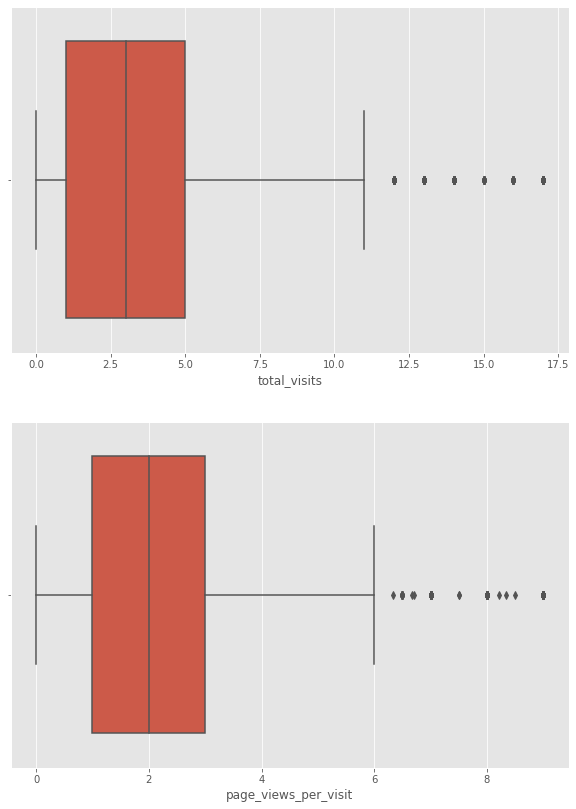

In [61]:
plt.figure(figsize = (10, 14))

plt.subplot(2,1,1)
sns.boxplot(df_data.total_visits)

plt.subplot(2,1,2)
sns.boxplot(df_data.page_views_per_visit)
plt.show()

As we can see, we were able to significantly reduce the number of outliers by capping

## 4.4 Test-Train Split

In [62]:
# Putting feature variable to X
X = df_data.drop(['lead_number', 'converted'], axis=1)

X.head(1)

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
0,0,0.00,0,0.00,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [63]:
# Putting response variable to y
y = df_data['converted']

y.head(1)

0    0
Name: converted, dtype: int64

In [64]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 4.5 Feature Scaling

In [65]:
#Scalling
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_origin_Lead Add Form and Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Industry Specializations,specialization_Management Specializations,occupation_Unemployed,occupation_Working Professional,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
1871,-0.29,-1.02,-0.89,-1.18,-0.67,0,0,0,1,0,0,0,0,1,1,0,0,0
6795,-0.29,0.21,0.01,-0.50,1.49,1,0,0,0,0,0,0,0,0,1,0,1,0
3516,-0.29,0.51,-0.69,0.09,-0.67,0,0,0,1,0,0,0,0,1,1,0,1,0
8105,-0.29,0.51,1.37,1.36,-0.67,1,0,1,0,0,0,0,1,0,1,0,0,0
3934,-0.29,-1.02,-0.89,-1.18,-0.67,0,0,0,1,0,0,0,0,1,1,0,1,0


In [66]:
# checking the conversion rate
conversion = (sum(df_data['converted'])/len(df_data['converted'].index))*100
conversion

38.53896103896104

The conversion rate is 38.5%

## 4.6 Looking at correlations

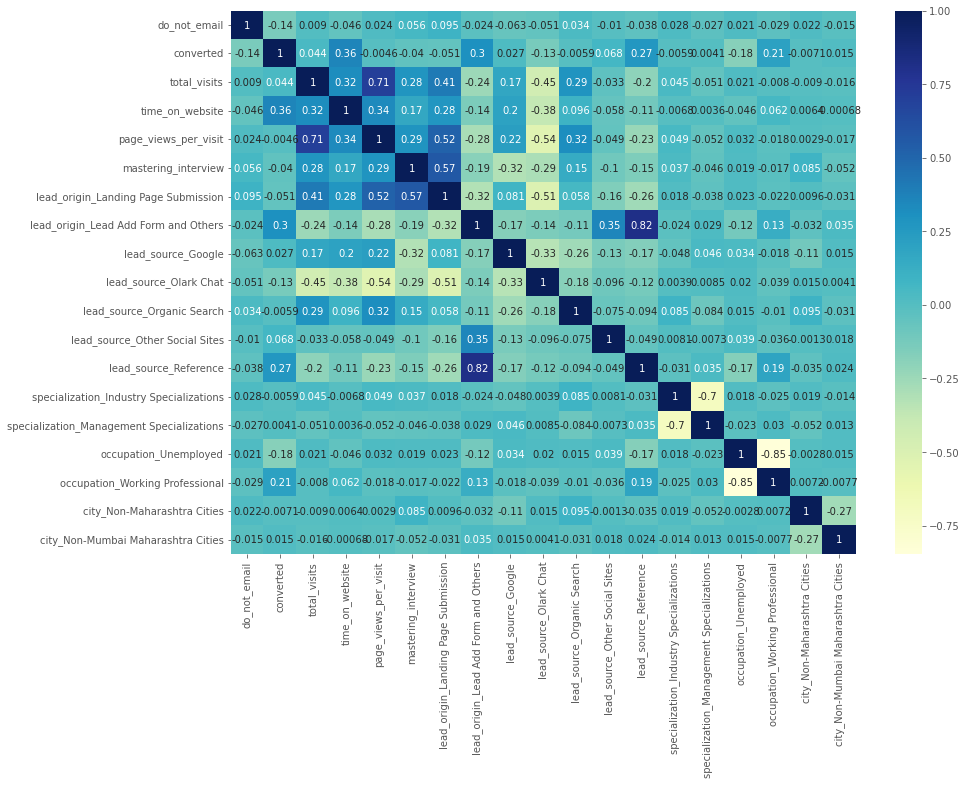

In [67]:
# Let's see the correlation matrix 
plt.figure(figsize = (14,10))       
sns.heatmap(df_data.corr(),annot = True, cmap="YlGnBu")
plt.show()

### 4.6.1 Drop highly correlated dummy variables

In [68]:
X_test.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Lead Add Form and Others', 'specialization_Industry Specializations', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

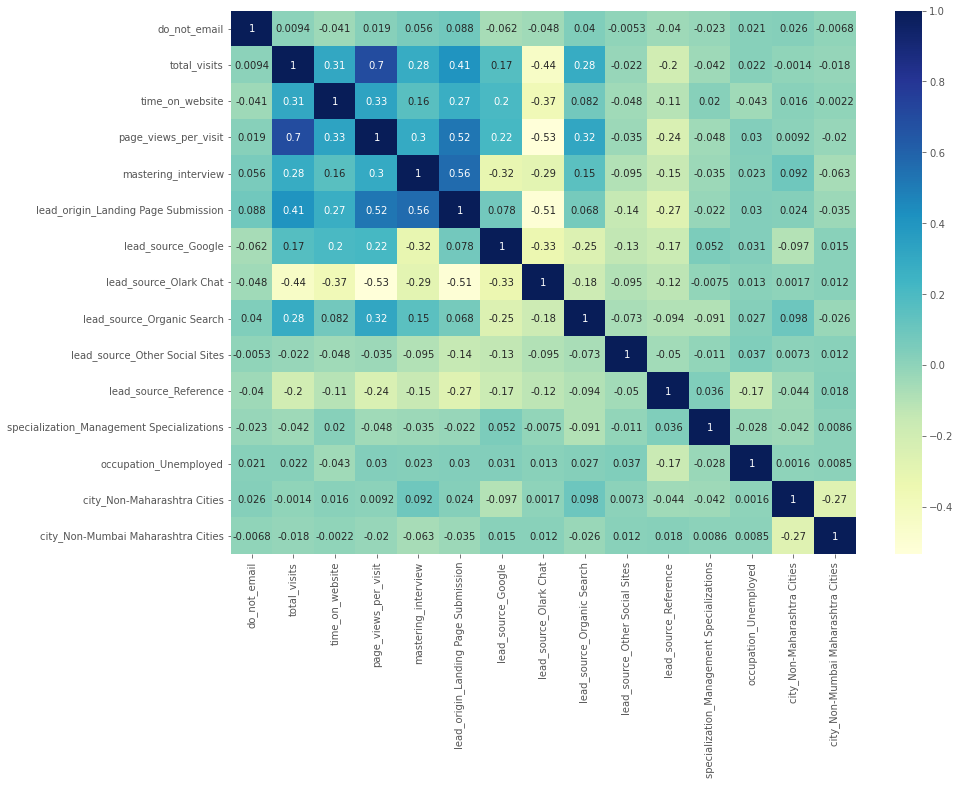

In [69]:
## lets check the correlation matrix again
plt.figure(figsize = (14,10))       
sns.heatmap(X_train.corr(),annot = True, cmap="YlGnBu")
plt.show()

# 5. Model Building

## 5.1 Model Building using Stats Model & RFE

In [70]:
#logisticRegression
logreg = LogisticRegression()

#RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('mastering_interview', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_source_Google', True, 1),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', True, 1),
 ('lead_source_Other Social Sites', True, 1),
 ('lead_source_Reference', True, 1),
 ('specialization_Management Specializations', True, 1),
 ('occupation_Unemployed', True, 1),
 ('city_Non-Maharashtra Cities', True, 1),
 ('city_Non-Mumbai Maharashtra Cities', True, 1)]

In [73]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['do_not_email', 'total_visits', 'time_on_website',
       'page_views_per_visit', 'mastering_interview',
       'lead_origin_Landing Page Submission', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Other Social Sites', 'lead_source_Reference',
       'specialization_Management Specializations', 'occupation_Unemployed',
       'city_Non-Maharashtra Cities', 'city_Non-Mumbai Maharashtra Cities'],
      dtype='object')

In [74]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

### Model 1

In [75]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3302.0
Date:                Wed, 02 Feb 2022   Deviance:                       6604.1
Time:                        07:41:04   Pearson chi2:                 6.65e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2920      0.139     -2.093      0.036      -0.565      -0.019
do_not_email                                 -0.3302      0.039     -8.536      0.000      -0.406      -0.254
total_visits                                  0.1397      0.042      3.346      0.001       0.058       0.222
time_on_website                               1.0450      0.036     29.332      0.000       0.975       1.115
page_views_per_visit                         -0.1898      0.048     -3.920      0.000      -0.285      -0.095
mastering_interview                           0.0011      0.044      0.025      0.980      -0.084       0.086
lead_origin_Landing Page Submission          -0.0042      0.092     -0.045      0.964      -0.185       0.177
lead_source_Google                            0.3660      0.101      3.640      0.000       0.169       0.563
lead_source_Olark Chat                        0.6541      0.137      4.786      0.000       0.386       0.922
lead_source_Organic Search                    0.2214      0.116      1.911      0.056      -0.006       0.448
lead_source_Other Social Sites                1.6141      0.175      9.225      0.000       1.271       1.957
lead_source_Reference                         3.9527      0.221     17.875      0.000       3.519       4.386
specialization_Management Specializations    -0.0905      0.069     -1.321      0.186      -0.225       0.044
occupation_Unemployed                        -0.8954      0.085    -10.493      0.000      -1.063      -0.728
city_Non-Maharashtra Cities                   0.0413      0.079      0.525      0.599      -0.113       0.195
city_Non-Mumbai Maharashtra Cities            0.0055      0.076      0.072      0.943      -0.144       0.155
=============================================================================================================
"""

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,occupation_Unemployed,5.02
5,lead_origin_Landing Page Submission,3.67
11,specialization_Management Specializations,3.20
6,lead_source_Google,2.74
7,lead_source_Olark Chat,2.58
3,page_views_per_visit,2.56
4,mastering_interview,2.04
1,total_visits,2.03
8,lead_source_Organic Search,1.48
10,lead_source_Reference,1.37


p-value of variable  `lead_origin_Landing Page Submission` is high, so we can drop it.



In [77]:
#dropping column with high p-value

col = col.drop('lead_origin_Landing Page Submission',1)

### Model 2

In [78]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3302.0
Date:                Wed, 02 Feb 2022   Deviance:                       6604.1
Time:                        07:41:06   Pearson chi2:                 6.65e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.2953      0.118     -2.506      0.012      -0.526      -0.064
do_not_email                                 -0.3302      0.039     -8.543      0.000      -0.406      -0.254
total_visits                                  0.1397      0.042      3.346      0.001       0.058       0.222
time_on_website                               1.0450      0.036     29.333      0.000       0.975       1.115
page_views_per_visit                         -0.1903      0.047     -4.038      0.000      -0.283      -0.098
mastering_interview                           0.0005      0.041      0.012      0.990      -0.081       0.082
lead_source_Google                            0.3667      0.099      3.693      0.000       0.172       0.561
lead_source_Olark Chat                        0.6565      0.126      5.211      0.000       0.410       0.903
lead_source_Organic Search                    0.2228      0.112      1.994      0.046       0.004       0.442
lead_source_Other Social Sites                1.6164      0.168      9.645      0.000       1.288       1.945
lead_source_Reference                         3.9550      0.215     18.413      0.000       3.534       4.376
specialization_Management Specializations    -0.0905      0.069     -1.321      0.187      -0.225       0.044
occupation_Unemployed                        -0.8953      0.085    -10.494      0.000      -1.063      -0.728
city_Non-Maharashtra Cities                   0.0413      0.079      0.526      0.599      -0.113       0.195
city_Non-Mumbai Maharashtra Cities            0.0055      0.076      0.072      0.942      -0.144       0.155
=============================================================================================================
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,occupation_Unemployed,4.22
10,specialization_Management Specializations,3.01
5,lead_source_Google,2.69
6,lead_source_Olark Chat,2.52
3,page_views_per_visit,2.44
1,total_visits,2.03
4,mastering_interview,1.67
7,lead_source_Organic Search,1.48
9,lead_source_Reference,1.36
12,city_Non-Maharashtra Cities,1.34


p-value of variable `specialization_Management Specializations` is high, so we can drop it.

In [80]:
#dropping column with high p-value

col = col.drop('specialization_Management Specializations',1)

### Model 3

In [81]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3302.9
Date:                Wed, 02 Feb 2022   Deviance:                       6605.8
Time:                        07:41:07   Pearson chi2:                 6.66e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.3650      0.105     -3.462      0.001      -0.572      -0.158
do_not_email                          -0.3292      0.039     -8.524      0.000      -0.405      -0.254
total_visits                           0.1401      0.042      3.357      0.001       0.058       0.222
time_on_website                        1.0434      0.036     29.321      0.000       0.974       1.113
page_views_per_visit                  -0.1883      0.047     -3.999      0.000      -0.281      -0.096
mastering_interview                    0.0013      0.041      0.031      0.975      -0.080       0.082
lead_source_Google                     0.3656      0.099      3.683      0.000       0.171       0.560
lead_source_Olark Chat                 0.6602      0.126      5.241      0.000       0.413       0.907
lead_source_Organic Search             0.2323      0.111      2.083      0.037       0.014       0.451
lead_source_Other Social Sites         1.6199      0.168      9.666      0.000       1.291       1.948
lead_source_Reference                  3.9542      0.215     18.409      0.000       3.533       4.375
occupation_Unemployed                 -0.8932      0.085    -10.473      0.000      -1.060      -0.726
city_Non-Maharashtra Cities            0.0443      0.079      0.563      0.573      -0.110       0.198
city_Non-Mumbai Maharashtra Cities     0.0056      0.076      0.074      0.941      -0.144       0.156
======================================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,occupation_Unemployed,3.61
5,lead_source_Google,2.48
3,page_views_per_visit,2.44
6,lead_source_Olark Chat,2.40
1,total_visits,2.03
4,mastering_interview,1.63
7,lead_source_Organic Search,1.46
11,city_Non-Maharashtra Cities,1.33
12,city_Non-Mumbai Maharashtra Cities,1.33
9,lead_source_Reference,1.29


p-value of variable `mastering_interview` is high, so we can drop it.

In [83]:
#dropping column with high p-value

col = col.drop('mastering_interview',1)

### Model 4

In [84]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3302.9
Date:                Wed, 02 Feb 2022   Deviance:                       6605.8
Time:                        07:41:08   Pearson chi2:                 6.66e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.3638      0.098     -3.698      0.000      -0.557      -0.171
do_not_email                          -0.3292      0.039     -8.528      0.000      -0.405      -0.254
total_visits                           0.1403      0.042      3.379      0.001       0.059       0.222
time_on_website                        1.0434      0.036     29.327      0.000       0.974       1.113
page_views_per_visit                  -0.1882      0.047     -4.004      0.000      -0.280      -0.096
lead_source_Google                     0.3638      0.079      4.593      0.000       0.209       0.519
lead_source_Olark Chat                 0.6585      0.113      5.838      0.000       0.437       0.880
lead_source_Organic Search             0.2314      0.108      2.143      0.032       0.020       0.443
lead_source_Other Social Sites         1.6181      0.157     10.299      0.000       1.310       1.926
lead_source_Reference                  3.9524      0.207     19.099      0.000       3.547       4.358
occupation_Unemployed                 -0.8932      0.085    -10.474      0.000      -1.060      -0.726
city_Non-Maharashtra Cities            0.0443      0.079      0.565      0.572      -0.110       0.198
city_Non-Mumbai Maharashtra Cities     0.0055      0.076      0.072      0.942      -0.144       0.155
======================================================================================================
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,occupation_Unemployed,3.05
3,page_views_per_visit,2.43
5,lead_source_Olark Chat,2.11
1,total_visits,2.01
4,lead_source_Google,1.81
6,lead_source_Organic Search,1.43
11,city_Non-Mumbai Maharashtra Cities,1.32
10,city_Non-Maharashtra Cities,1.31
2,time_on_website,1.23
8,lead_source_Reference,1.22


p-value of variable `city_Non-Mumbai Maharashtra Cities` is high, so we can drop it.

In [86]:
#dropping column with high p-value

col = col.drop('city_Non-Mumbai Maharashtra Cities',1)

### Model 5

In [87]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3302.9
Date:                Wed, 02 Feb 2022   Deviance:                       6605.8
Time:                        07:41:08   Pearson chi2:                 6.66e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.3624      0.096     -3.764      0.000      -0.551      -0.174
do_not_email                      -0.3292      0.039     -8.528      0.000      -0.405      -0.254
total_visits                       0.1402      0.042      3.378      0.001       0.059       0.222
time_on_website                    1.0435      0.036     29.334      0.000       0.974       1.113
page_views_per_visit              -0.1883      0.047     -4.004      0.000      -0.280      -0.096
lead_source_Google                 0.3637      0.079      4.592      0.000       0.208       0.519
lead_source_Olark Chat             0.6585      0.113      5.839      0.000       0.437       0.880
lead_source_Organic Search         0.2314      0.108      2.144      0.032       0.020       0.443
lead_source_Other Social Sites     1.6183      0.157     10.302      0.000       1.310       1.926
lead_source_Reference              3.9527      0.207     19.102      0.000       3.547       4.358
occupation_Unemployed             -0.8931      0.085    -10.473      0.000      -1.060      -0.726
city_Non-Maharashtra Cities        0.0428      0.076      0.566      0.571      -0.105       0.191
==================================================================================================
"""

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,occupation_Unemployed,2.87
3,page_views_per_visit,2.43
5,lead_source_Olark Chat,2.09
1,total_visits,2.01
4,lead_source_Google,1.80
6,lead_source_Organic Search,1.43
10,city_Non-Maharashtra Cities,1.24
2,time_on_website,1.23
8,lead_source_Reference,1.21
7,lead_source_Other Social Sites,1.11


p-value of variable `city_Non-Maharashtra Cities` is high, so we can drop it.

In [89]:
#dropping column with high p-value

col = col.drop('city_Non-Maharashtra Cities',1)

### Model 6

In [90]:
#BUILDING MODEL #6

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3303.1
Date:                Wed, 02 Feb 2022   Deviance:                       6606.1
Time:                        07:41:09   Pearson chi2:                 6.66e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.3519      0.094     -3.725      0.000      -0.537      -0.167
do_not_email                      -0.3286      0.039     -8.518      0.000      -0.404      -0.253
total_visits                       0.1395      0.041      3.362      0.001       0.058       0.221
time_on_website                    1.0438      0.036     29.345      0.000       0.974       1.114
page_views_per_visit              -0.1885      0.047     -4.009      0.000      -0.281      -0.096
lead_source_Google                 0.3595      0.079      4.559      0.000       0.205       0.514
lead_source_Olark Chat             0.6563      0.113      5.823      0.000       0.435       0.877
lead_source_Organic Search         0.2353      0.108      2.185      0.029       0.024       0.446
lead_source_Other Social Sites     1.6169      0.157     10.296      0.000       1.309       1.925
lead_source_Reference              3.9462      0.207     19.103      0.000       3.541       4.351
occupation_Unemployed             -0.8929      0.085    -10.473      0.000      -1.060      -0.726
==================================================================================================
"""

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,occupation_Unemployed,2.72
3,page_views_per_visit,2.43
5,lead_source_Olark Chat,2.08
1,total_visits,2.01
4,lead_source_Google,1.80
6,lead_source_Organic Search,1.41
2,time_on_website,1.22
8,lead_source_Reference,1.20
7,lead_source_Other Social Sites,1.11
0,do_not_email,1.02


* `So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:`

## 5.2  Making Predictions on the Train Set

Let's now make predicitons on the train set.

In [92]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871   0.21
6795   0.27
3516   0.24
8105   0.61
3934   0.21
4844   0.85
3297   0.16
8071   0.97
987    0.76
7423   0.79
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20799543, 0.26512031, 0.23860532, 0.61058409, 0.20799543,
       0.8516563 , 0.16359402, 0.96873989, 0.75527815, 0.79181656])

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.21,1871
1,0,0.27,6795
2,0,0.24,3516
3,0,0.61,8105
4,0,0.21,3934


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [95]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.21,1871,0
1,0,0.27,6795,0
2,0,0.24,3516,0
3,0,0.61,8105,1
4,0,0.21,3934,0


### 5.2.1 Confusion Matrix,Accuracy,Sensitivity,Specificity,False Postive Rate,Positive predictive and Negative predictive

In [96]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3495  507]
 [1021 1445]]


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7637600494743352


In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5859691808596919

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.8733133433283359

In [101]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.12668665667166418


In [102]:
# positive predictive value 
print (TP / float(TP+FP))

0.7402663934426229


In [103]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7739149689991143


## 5.2.2 PLOTTING ROC CURVE

In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

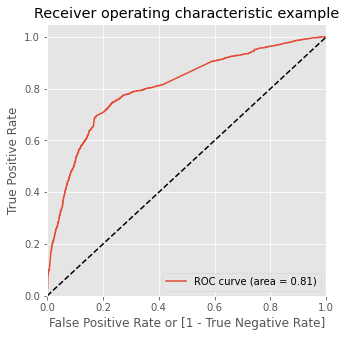

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)


The ROC Curve should be a value close to 1. We are getting a good value of 0.81 indicating a good predictive model.

### 5.2.3 Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [107]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.21,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.27,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.24,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.61,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.21,3934,0,1,1,1,0,0,0,0,0,0,0


In [108]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.43   0.99   0.08
0.20  0.20      0.59   0.91   0.39
0.30  0.30      0.75   0.77   0.74
0.40  0.40      0.78   0.69   0.83
0.50  0.50      0.76   0.59   0.87
0.60  0.60      0.75   0.49   0.91
0.70  0.70      0.72   0.35   0.94
0.80  0.80      0.69   0.24   0.97
0.90  0.90      0.65   0.09   1.00


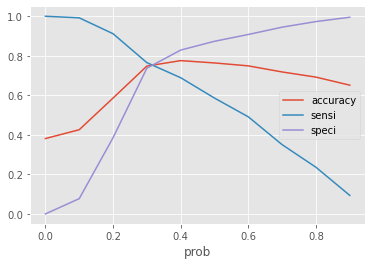

In [109]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

####  From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [110]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.21,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.27,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.24,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.61,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.21,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [111]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.21,1871,0,21
1,0,0.27,6795,0,27
2,0,0.24,3516,0,24
3,0,0.61,8105,1,61
4,0,0.21,3934,0,21


In [112]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7479901051329623

In [113]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2951, 1051],
       [ 579, 1887]], dtype=int64)

In [114]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7652068126520681

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.7373813093453273

##### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.81. We have the following values for the Train Data:

* Accuracy : 74.79%
* Sensitivity : 76.52%
* Specificity : 73.73%

### Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [117]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.26261869065467264


In [118]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6422736555479919


In [119]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8359773371104816


In [120]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2951, 1051],
       [ 579, 1887]], dtype=int64)

##### Precision

In [121]:
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6422736555479919

##### Recall

In [122]:
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7652068126520681

In [123]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6422736555479919

In [124]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7652068126520681

#### Precision_Recall_Curve

In [125]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

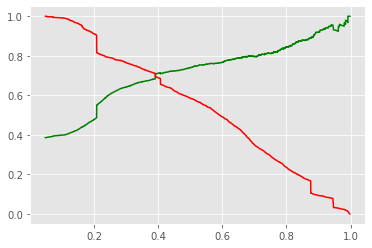

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 5.3  Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [127]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,mastering_interview,lead_origin_Landing Page Submission,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,specialization_Management Specializations,occupation_Unemployed,city_Non-Maharashtra Cities,city_Non-Mumbai Maharashtra Cities
4269,-0.30,1.48,0.93,2.84,-0.68,0,0,0,0,0,0,1,1,1,0
2376,-0.30,-1.05,-0.90,-1.18,-0.68,0,0,0,0,0,1,1,1,0,1
7766,-0.30,0.53,-0.79,1.33,-0.68,0,1,0,0,0,0,1,0,0,1
9199,-0.30,-1.05,-0.90,-1.18,-0.68,0,0,1,0,0,0,1,1,1,0
4359,-0.30,-1.05,-0.90,-1.18,-0.68,0,0,0,0,0,1,1,1,0,1


In [128]:
X_test = X_test[col]
X_test.head()

,do_not_email,total_visits,time_on_website,page_views_per_visit,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Other Social Sites,lead_source_Reference,occupation_Unemployed
4269,-0.30,1.48,0.93,2.84,0,0,0,0,0,1
2376,-0.30,-1.05,-0.90,-1.18,0,0,0,0,1,1
7766,-0.30,0.53,-0.79,1.33,1,0,0,0,0,0
9199,-0.30,-1.05,-0.90,-1.18,0,1,0,0,0,1
4359,-0.30,-1.05,-0.90,-1.18,0,0,0,0,1,1


In [129]:
X_test_sm = sm.add_constant(X_test)

### 5.3.1 PREDICTIONS ON TEST SET


In [130]:
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:10]

4269   0.38
2376   0.87
7766   0.29
9199   0.21
4359   0.87
9186   0.31
1631   0.50
8963   0.24
8007   0.24
5324   0.18
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()


,0
4269,0.38
2376,0.87
7766,0.29
9199,0.21
4359,0.87


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
y_pred_final.head()

,converted,Prospect ID,0
0,1,4269,0.38
1,1,2376,0.87
2,1,7766,0.29
3,0,9199,0.21
4,1,4359,0.87


In [139]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [140]:
y_pred_final.head()

,converted,Prospect ID,Converted_prob
0,1,4269,0.38
1,1,2376,0.87
2,1,7766,0.29
3,0,9199,0.21
4,1,4359,0.87


In [141]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [142]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,converted,Converted_prob,Lead_Score
0,4269,1,0.38,38
1,2376,1,0.87,87
2,7766,1,0.29,29
3,9199,0,0.21,21
4,4359,1,0.87,87


In [143]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [144]:
y_pred_final.head()

,Prospect ID,converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.38,38,1
1,2376,1,0.87,87,1
2,7766,1,0.29,29,0
3,9199,0,0.21,21,0
4,4359,1,0.87,87,1


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_Predicted)

0.746031746031746

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_Predicted )
confusion2

array([[1246,  431],
       [ 273,  822]], dtype=int64)

In [147]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7652068126520681

In [148]:
# Let us calculate specificity
TN / float(TN+FP)

0.7373813093453273

In [149]:
precision_score(y_pred_final.converted , y_pred_final.final_Predicted)

0.656025538707103

In [150]:
recall_score(y_pred_final.converted, y_pred_final.final_Predicted)

0.7506849315068493

#### Observation:
After running the model on the Test Data these are the figures we obtain:

* Accuracy : 74.60%
* Sensitivity : 76.52%
* Specificity : 73.73%

# Final Observation:
Let us compare the values obtained for Train & Test:

#### Train Data: 

* Accuracy : 74.79%
* Sensitivity : 76.52%
* Specificity : 73.73%

#### Test Data: 

* Accuracy : 74.60%
* Sensitivity : 76.52%
* Specificity : 73.73%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model